# Task1 赛题理解
Tip:本次新人赛是Datawhale与天池联合发起的0基础入门系列赛事第四场 —— 零基础入门金融风控之贷款违约预测挑战赛。 赛题以金融风控中的个人信贷为背景，要求选手根据贷款申请人的数据信息预测其是否有违约的可能，以此判断是否通过此项贷款，这是一个典型的分类问题。通过这道赛题来引导大家了解金融风控中的一些业务背景，解决实际问题，帮助竞赛新人进行自我练习、自我提高。

项目地址：https://github.com/datawhalechina/team-learning-data-mining/tree/master/FinancialRiskControl

比赛地址：https://tianchi.aliyun.com/competition/entrance/531830/introduction

# 1.1 学习目标
理解赛题数据和目标，清楚评分体系。

完成相应报名，下载数据和结果提交打卡（可提交示例结果），熟悉比赛流程

# 1.2 了解赛题
赛题概况
数据概况
预测指标
分析赛题

# 1.2.1 赛题概况
比赛要求参赛选手根据给定的数据集，建立模型，预测金融风险。
赛题以预测金融风险为任务，数据集报名后可见并可下载，该数据来自某信贷平台的贷款记录，总数据量超过120w，包含47列变量信息，其中15列为匿名变量。为了保证比赛的公平性，将会从中抽取80万条作为训练集，20万条作为测试集A，20万条作为测试集B，同时会对employmentTitle、purpose、postCode和title等信息进行脱敏。

通过这道赛题来引导大家走进金融风控数据竞赛的世界，主要针对于于竞赛新人进行自我练习、自我提高。

# 1.2.2 数据概况
一般而言，对于数据在比赛界面都有对应的数据概况介绍（匿名特征除外），说明列的性质特征。了解列的性质会有助于我们对于数据的理解和后续分析。

# 1.2.3 预测指标
竞赛采用AUC作为评价指标。AUC（Area Under Curve）被定义为 ROC曲线 下与坐标轴围成的面积。

# 1.3 代码示例
本部分为对于数据读取和指标评价的示例。

# 1.3.1 数据读取pandas

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('data/train.csv')
testA = pd.read_csv('data/testA.csv')

In [3]:
print('Train data shape:',train.shape)
print('TestA data shape:',testA.shape)

Train data shape: (800000, 47)
TestA data shape: (200000, 48)


In [4]:
train.head()

id  loanAmnt  term  interestRate  installment grade subGrade  \
0   0   35000.0     5         19.52       917.97     E       E2   
1   1   18000.0     5         18.49       461.90     D       D2   
2   2   12000.0     5         16.99       298.17     D       D3   
3   3   11000.0     3          7.26       340.96     A       A4   
4   4    3000.0     3         12.99       101.07     C       C2   

   employmentTitle employmentLength  homeOwnership  ...    n5    n6    n7  \
0            320.0          2 years              2  ...   9.0   8.0   4.0   
1         219843.0          5 years              0  ...   NaN   NaN   NaN   
2          31698.0          8 years              0  ...   0.0  21.0   4.0   
3          46854.0        10+ years              1  ...  16.0   4.0   7.0   
4             54.0              NaN              1  ...   4.0   9.0  10.0   

     n8   n9   n10  n11  n12  n13  n14  
0  12.0  2.0   7.0  0.0  0.0  0.0  2.0  
1   NaN  NaN  13.0  NaN  NaN  NaN  NaN  
2   5.0  3.0  11.0  0.0  0.0  0.0  4.0  
3  21.0  6.0   9.0  0.0  0.0  0.0  1.0  
4  15.0  7.0  12.0  0.0  0.0  0.0  4.0  

[5 rows x 47 columns]

# 1.3.2 分类指标评价计算示例

In [5]:
## 混淆矩阵
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred = [0, 1, 0, 1]
y_true = [0, 1, 1, 0]
print('混淆矩阵:\n',confusion_matrix(y_true, y_pred))

混淆矩阵:
 [[1 1]
 [1 1]]


In [6]:
## accuracy
from sklearn.metrics import accuracy_score
y_pred = [0, 1, 0, 1]
y_true = [0, 1, 1, 0]
print('ACC:',accuracy_score(y_true, y_pred))

ACC: 0.5


In [7]:
## Precision,Recall,F1-score
from sklearn import metrics
y_pred = [0, 1, 0, 1]
y_true = [0, 1, 1, 0]
print('Precision',metrics.precision_score(y_true, y_pred))
print('Recall',metrics.recall_score(y_true, y_pred))
print('F1-score:',metrics.f1_score(y_true, y_pred))

Precision 0.5
Recall 0.5
F1-score: 0.5


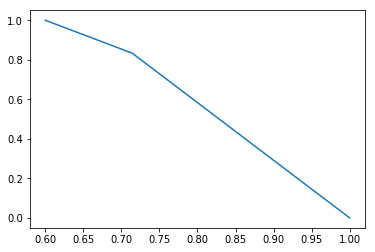

In [9]:
## P-R曲线
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
plt.plot(precision, recall)
plt.show()

Text(0.5, 0, 'FPR')

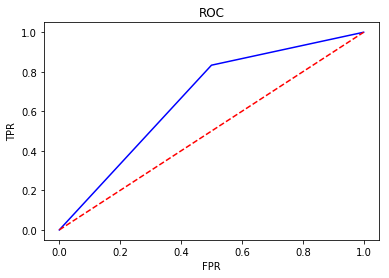

In [10]:
## ROC曲线
from sklearn.metrics import roc_curve
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
FPR,TPR,thresholds=roc_curve(y_true, y_pred)
plt.title('ROC')
plt.plot(FPR, TPR,'b')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')

In [11]:
## AUC
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
print('AUC socre:',roc_auc_score(y_true, y_scores))

AUC socre: 0.75


In [12]:
## KS值 在实际操作时往往使用ROC曲线配合求出KS值
from sklearn.metrics import roc_curve
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 1, 1]
FPR,TPR,thresholds=roc_curve(y_true, y_pred)
KS=abs(FPR-TPR).max()
print('KS值：',KS)

KS值： 0.5238095238095237


# 1.5 拓展知识——评分卡
评分卡是一张拥有分数刻度会让相应阈值的表。信用评分卡是用于用户信用的一张刻度表。以下代码是一个非标准评分卡的代码流程，用于刻画用户的信用评分。评分卡是金融风控中常用的一种对于用户信用进行刻画的手段哦！

In [13]:
#评分卡 不是标准评分卡
def Score(prob,P0=600,PDO=20,badrate=None,goodrate=None):
    P0 = P0
    PDO = PDO
    theta0 = badrate/goodrate
    B = PDO/np.log(2)
    A = P0 + B*np.log(2*theta0)
    score = A-B*np.log(prob/(1-prob))
    return score